<a href="https://colab.research.google.com/github/hhammza/ML-Continued/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My First ML Project**


# **Load Data**

In [ ]:
import pandas as pd

# data frame
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **Data Preparation**

## Data Sepration as x and y

In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x = df.drop('logS', axis=1)
# axis = 1: allows drop func to work with data as colun mode.

x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Split Data Set

Split Data Set as Training Set and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [ ]:
x_train, y_train, x_test, y_test

(     MolLogP    MolWt  NumRotatableBonds  AromaticProportion
 107  3.14280  112.216                5.0            0.000000
 378 -2.07850  142.070                0.0            0.000000
 529 -0.47730  168.152                0.0            0.000000
 546 -0.86740  154.125                0.0            0.000000
 320  1.62150  100.161                2.0            0.000000
 ..       ...      ...                ...                 ...
 802  3.00254  250.301                1.0            0.842105
 53   2.13860   82.146                3.0            0.000000
 350  5.76304  256.348                0.0            0.900000
 79   3.89960  186.339               10.0            0.000000
 792  2.52334  310.297                3.0            0.300000
 
 [915 rows x 4 columns],
 107   -4.440
 378   -1.250
 529   -1.655
 546   -1.886
 320   -0.740
        ...  
 802   -2.925
 53    -2.680
 350   -7.020
 79    -4.800
 792   -3.240
 Name: logS, Length: 915, dtype: float64,
       MolLogP    MolWt  NumRotat

# **Model Building**


## **Linear Regression**

### Training th Model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Applying the Model to make prediction

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

### Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Methods', 'Trainning MSE', 'Training R2', 'Testing MSE', 'Testing R2']

In [ ]:
lr_results

,Methods,Trainning MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**


### Training the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

###Applying the model to make prediction

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forests', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forests,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [ ]:
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forests,1.028228,0.759669,1.407688,0.709223


# **Data Visualization of prediction results**

Text(0.5, 0, 'Experimental LogS')

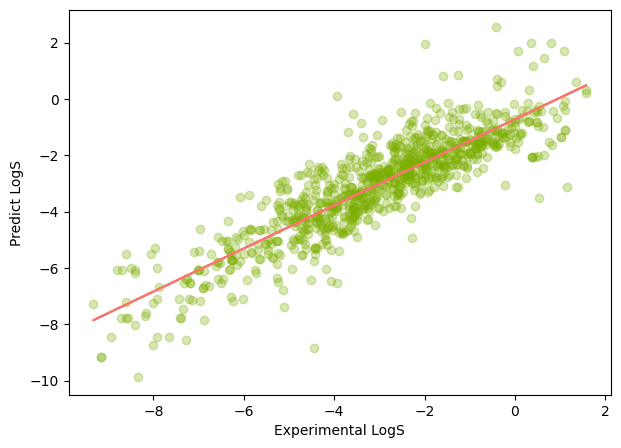

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')